# Solución numérica de ecuaciones diferenciales ordinarias 
## (Intermezzo: Series de Taylor)
<hr/>
##### Recordemos que una serie de Taylor es una representacion en serie de una función, donde los términos de la serie se calculan en un punto $x=a$ el cual decimos que es el centro de la expansión en serie:

\begin{equation}
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a) =
f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \dots
\end{equation}

##### Tomemos como ejemplo la expansion en serie de la funcion exponencial y veamos que a medida que sumamos cada vez más términos de la serie, la misma converge a la función exponencial:

In [7]:
import math as m

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# aproximacion de Taylor de exp(x)
# alrededor de x=0 y sumando n terminos
def taylor_exp(x,n):
    sum=0.0
    for i in range(n+1):
        sum = sum + pow(x,i)/factorial(i)
    return sum

# vemos como la serie de Taylor aproxima
# la funcion para un valor expecífico
print(m.exp(2.0))
print(taylor_exp(2.0,15))

7.38905609893065
7.389056095384136


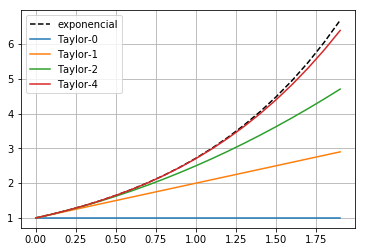

In [12]:
import numpy as np
x = np.arange(0.0,2.0,0.1)
y = np.zeros(np.size(x),'float32')
y0 = np.zeros(np.size(x),'float32')
y1 = np.zeros(np.size(x),'float32')
y2 = np.zeros(np.size(x),'float32')
y4 = np.zeros(np.size(x),'float32')
for i in range(np.size(x)):
    y[i]= m.exp(x[i])
    y0[i]=taylor_exp(x[i],0)
    y1[i]=taylor_exp(x[i],1)
    y2[i]=taylor_exp(x[i],2)
    y4[i]=taylor_exp(x[i],4)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'k--',label='exponencial')
plt.plot(x,y0,label='Taylor-0')
plt.plot(x,y1,label='Taylor-1')
plt.plot(x,y2,label='Taylor-2')
plt.plot(x,y4,label='Taylor-4')
plt.legend()
plt.grid(True)

## (Método de Verlet)
<hr/>
##### El problema de valor inicial (de segundo orden):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = F(y) \\
		 y(0) = \alpha \\
         y'(0) = \beta
	       \end{array}
	     \right.
\end{equation}

##### se discretiza de manera similar al método de Euler y luego se aplica el siguiente algoritmo (*la deducción de este algoritmo se realiza truncando series de Taylor hacia adelante y hacia atras de $F(y)$*):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y_0 = \alpha \\
		 y_{-1} = y_0 - \beta \Delta x + \frac{1}{2}F(y_0)\Delta x^2 \\
         y_{i+1} = 2 y_i -y_{i-1} + F(y_i)\Delta x^2
	       \end{array}
	     \right.
\end{equation}

In [17]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

def verlet(f,a,b,xf,niter):
    dx = xf/(niter-1)
    xs = np.arange(0,xf+dx,dx)
    ys = np.zeros(np.size(xs))
    yinit = a-dx*b+0.5*dx*dx*f(a) # paso de arranque
    ys[0] = yinit
    ys[1] = a
    for i in range(1,niter-1):
        ys[i+1] = 2*ys[i]-ys[i-1]+f(ys[i])*pow(dx,2)
    return xs, ys

<hr/>
#### Solución a un problema de caida libre:
##### Se suelta un objeto (inicialmente en reposo) desde una altura de $100$ m.

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = -g \\
		 y(0) = 100 \\
         y'(0) = 0
	       \end{array}
	     \right.
\end{equation}

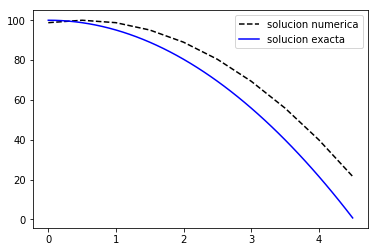

In [24]:
# Solucion de un problema de caida libre
def f(y):
    return -9.8

pos0 = 4.5
t, y = verlet(f,100.0,0.0,pos0,10)

def sol_ex(t):
    return 100 -9.8/2.0*pow(t,2)

t_ex = np.arange(0.0,pos0+0.1,0.1)
y_ex = np.zeros(np.size(t_ex))
for i in range(np.size(t_ex)):
    y_ex[i] = sol_ex(t_ex[i])

plt.plot(t,y,'k--',label = 'solucion numerica')
plt.plot(t_ex,y_ex,'b',label = 'solucion exacta')
plt.legend()

<hr/>
#### Solución a un problema oscilador lineal vs no-lineal:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = -\sin(y) \sim -y \\
		 y(0) = \theta_0 \\
         y'(0) = 0
	       \end{array}
	     \right.
\end{equation}

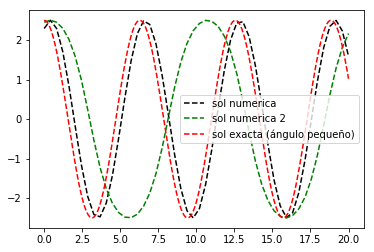

In [25]:
# solucion de un problema de oscilador lineal vs oscilador no-lineal
def f2(y):
    return -y

def f3(y):
    return -m.sin(y)

tfinal = 20.0
npuntos = 50
# ang_init = 0.5 angulo pequeño \theta_0
ang_init = 2.5
t2, y2 = verlet(f2,ang_init,0.0,tfinal,npuntos)
t3, y3 = verlet(f3,ang_init,0.0,tfinal,npuntos)

t_ex2 = np.arange(0.0,tfinal+0.1,0.1)
y_ex2 = np.zeros(np.size(t_ex2))
for i in range(np.size(t_ex2)):
    y_ex2[i] = ang_init*m.cos(t_ex2[i])

plt.plot(t2,y2,'k--',label='sol numerica')
plt.plot(t3,y3,'g--',label='sol numerica 2')
plt.plot(t_ex2,y_ex2,'r--',label = 'sol exacta (ángulo pequeño)')
plt.legend()
plt.show()